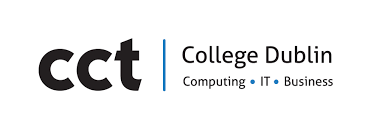

<h1>Artificial Intelligence & Data Visualisation </h1> </br>
<b>Assigment Title: </b> AI_DV_Lv8_ICA_v5
</br>
<b>Lecturers : </b> David McQuaid and Sam Weiss
</br> 
<b>Student: </b> Luiza Cavalcanti Albuquerque Brayner (2020309)

# Artificial Intelligence

# Scenario 1 
### Suppose Ciara knows Python, and only has funds to hire three more people.

<b> 1.	Using CSP (Constraint Satisfaction Problem) framework, discover if the above problem can be solved and if so detail who would be in hired. </b> 


In [18]:
# installing library
pip install python-constraint

SyntaxError: invalid syntax (862001551.py, line 2)

In [19]:
from itertools import combinations

# defining people and skills
people = {
    'Peter': ['Python', 'AI'],
    'Juan': ['Web', 'AI'],
    'Jim': ['AI', 'Systems'],
    'Jane': ['Python', 'Database'],
    'Mary': ['Web', 'AI'],
    'Bruce': ['Systems', 'Python'],
    'Anita': ['Photoshop', 'AI']
}

# defining working needs
working_needs = {
    'Python': 2,
    'AI': 2,  
    'Web': 1,
    'Database': 1,
    'Systems': 1
}

# store good match for vacancies
solutions = []

# nested loop to iterate through the range 1 to 4 (number of people considered) - now can hire one more person 
for people_found in range(1, 4):  # can hire 3 people
    # inner loop, uses a function to generate the combination and then gets the names through a dictionary named (people)
    # generated the combinations based on the outer loop current value
    for combination in combinations(people.keys(), people_found):
        # list of working skills to get the skills associated with each person
        working_skills = [skills for person in combination for skills in people[person]]

        # check if combination meets the skills 
        count_skills = {skills: working_skills.count(skills) for skills in set(working_skills)}
        if all(count_skills.get(paper, 0) >= 1 for paper in working_needs.keys()):
            # if it meets, then add to the solutions
            solutions.append(combination)

# show solutions to user 
if solutions:
    print("Solutions found:")
    for final in solutions:
        print(final)
        
# in case there is no solution, this message will be shown to the user
else:
      print("There is no solution to this problem")

Solutions found:
('Juan', 'Jim', 'Jane')
('Juan', 'Jane', 'Bruce')
('Jim', 'Jane', 'Mary')
('Jane', 'Mary', 'Bruce')


# Scenario 2 
### Suppose Ciara and Juan become partners, with the additional funds they can now employ four more people but must employ another AI Engineer, so they need 2 Python Programmers, 3 AI Engineers, 1 Web Designer, 1 Database Admin, and 1 Systems Engineer.

<b> 1.	Using any CSP (Constraint Satisfaction Problem) framework (using variables, value domains, and constraints), discover if the above problems can be solved and if so, detail who would be in hired. </b>

In [20]:
# imports 
from itertools import combinations

# defining people and skills
people = {
    'Peter': ['Python', 'AI'],
    'Juan': ['Web', 'AI'],
    'Jim': ['AI', 'Systems'],
    'Jane': ['Python', 'Database'],
    'Mary': ['Web', 'AI'],
    'Bruce': ['Systems', 'Python'],
    'Anita': ['Photoshop', 'AI']
}


# defining working needs
working_needs = {
    'Python': 2,
    'AI': 3,  # considering that now the count is 3 AI engineers
    'Web': 1,
    'Database': 1,
    'Systems': 1
}

# store good match for vacancies
solutions = []

# nested loop to iterate through the range 1 to 4 (number of people considered) - now can hire one more person 
for people_found in range(1, 5):  # can hire 4 people
    # inner loop, uses a function to generate the combination and then gets the names through a dictionary named (people)
    # generated the combinations based on the outer loop current value
    for combination in combinations(people.keys(), people_found):
        # list of working skills to get the skills associated with each person
        working_skills = [skills for person in combination for skills in people[person]]

        # check if combination meets the skills 
        count_skills = {skills: working_skills.count(skills) for skills in set(working_skills)}
        if all(count_skills.get(paper, 0) >= 1 for paper in working_needs.keys()):
            # if it meets, then add to the solutions
            solutions.append(combination)

# show solutions to user 
if solutions:
    print("Solutions found:")
    for final in solutions:
        print(final)
        
# in case there is no solution, this message will be shown to the user
else:
      print("There is no solution to this problem")

Solutions found:
('Juan', 'Jim', 'Jane')
('Juan', 'Jane', 'Bruce')
('Jim', 'Jane', 'Mary')
('Jane', 'Mary', 'Bruce')
('Peter', 'Juan', 'Jim', 'Jane')
('Peter', 'Juan', 'Jane', 'Bruce')
('Peter', 'Jim', 'Jane', 'Mary')
('Peter', 'Jane', 'Mary', 'Bruce')
('Juan', 'Jim', 'Jane', 'Mary')
('Juan', 'Jim', 'Jane', 'Bruce')
('Juan', 'Jim', 'Jane', 'Anita')
('Juan', 'Jane', 'Mary', 'Bruce')
('Juan', 'Jane', 'Bruce', 'Anita')
('Jim', 'Jane', 'Mary', 'Bruce')
('Jim', 'Jane', 'Mary', 'Anita')
('Jane', 'Mary', 'Bruce', 'Anita')


# Question 3
### 3.	These problems be solved using several other algorithm’s we have studied in the module. Choose one of these algorithms and discuss your answer in detail including a proof of your hypothesis in code.

<b>For specific problem of hiring employees given the constrains and avilable candidates, I would choose Depth-First Search (DFS) between the studied algorithms. </b> 

# Scenario 1 - DFS resolution

In [1]:
from collections import defaultdict

# define the abilities of each candidate
candidates = {
    "Peter": ["Python", "AI"],
    "Juan": ["Web", "AI"],
    "Jim": ["AI", "Systems"],
    "Jane": ["Python", "Database"],
    "Mary": ["Web", "AI"],
    "Bruce": ["Systems", "Python"],
    "Anita": ["Photoshop", "AI"]
}

# define Required roles
required_roles = {"Python": 2, "AI": 2, "Web": 1, "Database": 1, "Systems": 1}

# function to check if all roles are filled
def all_roles_filled(roles):
    return all(roles[role] == 0 for role in roles)

# modified DFS function to find all unique solutions (ignoring order)
def dfs_unique_solutions(current_state, depth, path, solutions):
    # to limit the depth, can only hire 3 more people
    if depth > 3: 
        return

    if all_roles_filled(current_state):
        solution_tuple = tuple(sorted(path))
        if solution_tuple not in solutions:
            solutions.add(solution_tuple)
        return

    for candidate, abilities in candidates.items():
        if candidate not in path:
            new_state = current_state.copy()
            for ability in abilities:
                if ability in new_state and new_state[ability] > 0:
                    new_state[ability] -= 1

            dfs_unique_solutions(new_state, depth + 1, path + [candidate], solutions)

# set to hold all unique solutions
unique_solutions = set()

# Pperform Depth First Search for all unique solutions
dfs_unique_solutions(initial_roles, 0, [], unique_solutions)


# convert the set to a list for easier readability
unique_solution_list = list(unique_solutions)

# print the unique solutions
print("Solutions Found:")
for solution in unique_solution_list:
    print(solution)

NameError: name 'initial_roles' is not defined

# Scenario 2 - DFS resolution

In [22]:
from itertools import combinations

# defining people and skills
people = {
  'Peter': ['Python', 'AI'],
  'Juan': ['Web', 'AI'],
  'Jim': ['AI', 'Systems'],
  'Jane': ['Python', 'Database'],
  'Mary': ['Web', 'AI'],
  'Bruce': ['Systems', 'Python'],
  'Anita': ['Photoshop', 'AI']
}

# defining working needs
working_needs = {
  'Python': 2,
  'AI': 3,
  'Web': 1,
  'Database': 1,
  'Systems': 1
}

# initialize solutions list
solutions = []

# function to check if the current solution meets the working needs
def dfs(people_list, current_solution):
  count_skills = {skill: sum(1 for person in current_solution if skill in people[person]) for skill in working_needs}
  
  if all(count_skills.get(skill, 0) >= working_needs[skill] for skill in working_needs):
      solutions.append(tuple(current_solution)) # add a tuple of current_solution to solutions

  # iterate over the remaining people_list
  for i in range(len(people_list)):
      person = people_list[i]
      # try adding the person to the current_solution and explore further
      dfs(people_list[i + 1:], current_solution + [person])

# start DFS with different numbers of people (in this case, from 1 to 4)
for people_found in range(1, 5):
  for combination in combinations(people.keys(), people_found):
      dfs(list(combination), [])

# show solutions to the user
if solutions:
  print("Solutions found:")
  for final in solutions:
      print(final)
# show message even if there are no solutions
else:
  print("There is no solution to this problem")

Solutions found:
('Peter', 'Juan', 'Jim', 'Jane')
('Peter', 'Jim', 'Jane', 'Mary')


# Data Visualisation

# Task 1 and 2

<b> Task 1: </b>Use appropriate visualisation to help communicate the CSP scenario and the corresponding solutions, if any, to the appropriate stakeholders.</br> <b> Task 2: </b>Create interactive visualisation to allow a user to explore alternate constraint scenarios

# Scenario 1 - Task 1

<b>Suppose Ciara knows Python, and only has funds to hire three more people.</b>

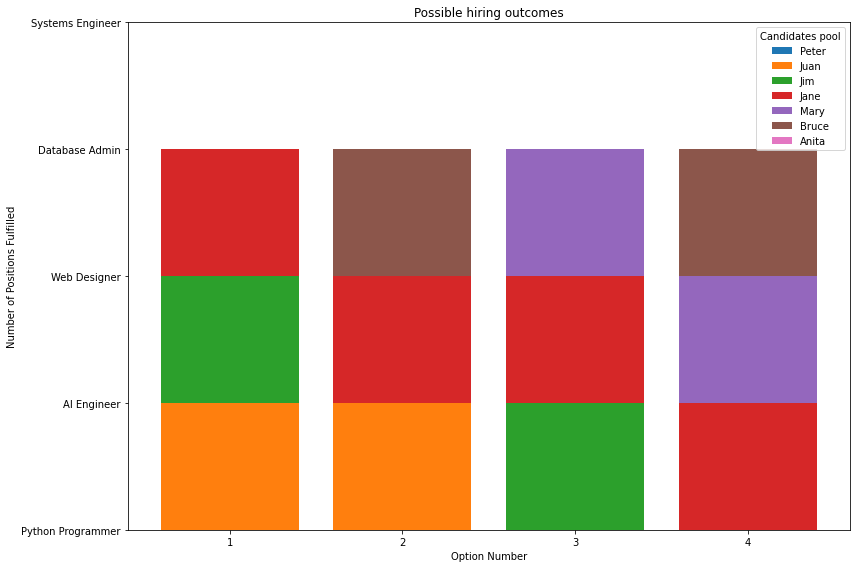

In [23]:
# imports
import numpy as np
import matplotlib.pyplot as plt

# defining people and their skills
people = {
    'Peter': ['Python', 'AI'],
    'Juan': ['Web', 'AI'],
    'Jim': ['AI', 'Systems'],
    'Jane': ['Python', 'Database'],
    'Mary': ['Web', 'AI'],
    'Bruce': ['Systems', 'Python'],
    'Anita': ['Photoshop', 'AI']
}

# defining positions needed and count
positions = {
    'Python Programmer': 2,
    'AI Engineer': 2,
    'Web Designer': 1,
    'Database Admin': 1,
    'Systems Engineer': 1
}

# solutions 
solutions = [
    ('Juan', 'Jim', 'Jane'),
    ('Juan', 'Jane', 'Bruce'),
    ('Jim', 'Jane', 'Mary'),
    ('Jane', 'Mary', 'Bruce')
]

# all people involved
all_people = list(people.keys())

# matrix to keep the positions for each person across different solutions
positions_matrix = np.zeros((len(all_people), len(solutions)))

# loop to add on the matrix the positions filled by each person over the options 
for i, person in enumerate(all_people):
    for j, solution in enumerate(solutions):
        positions_count = sum([1 for role in solution if role == person])
        positions_matrix[i, j] = positions_count

# adjusting the plot to stack bars for each person over the options 
plt.figure(figsize=(12, 8))

# base for the stacked bars
bottom = np.zeros(len(solutions))

# plotting
for i, person in enumerate(all_people):
    plt.bar(np.arange(len(solutions)) + 1, positions_matrix[i, :], bottom=bottom, label=person)
    bottom += positions_matrix[i, :]


plt.xlabel('Option Number')
plt.ylabel('Number of Positions Fulfilled')
plt.title('Possible hiring outcomes')
plt.xticks(np.arange(1, len(solutions) + 1))
plt.yticks(np.arange(0, len(solutions) + 1), positions.keys())  # Set y-axis ticks to position labels
plt.legend(loc='upper right', title='Candidates pool')
plt.tight_layout()
plt.show()


# Scenario 2 - Task 1

<b> Suppose Ciara and Juan become partners, with the additional funds they can now employ four more people but must employ another AI Engineer, so they need 2 Python Programmers, 2 AI Engineers, 1 Web Designer, 1 Database Admin, and 1 Systems Engineer.</b>

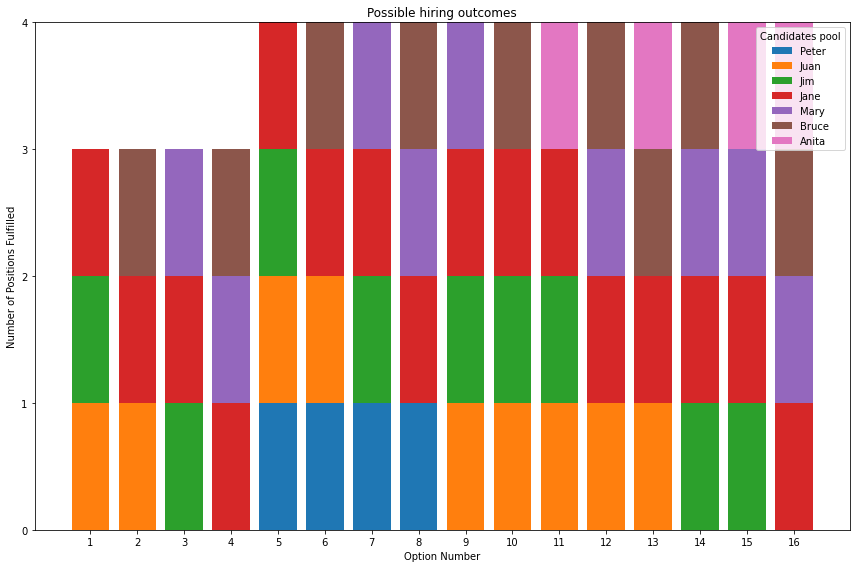

In [24]:
# imports
import numpy as np
import matplotlib.pyplot as plt

# defining people and their skills
people = {
    'Peter': ['Python', 'AI'],
    'Juan': ['Web', 'AI'],
    'Jim': ['AI', 'Systems'],
    'Jane': ['Python', 'Database'],
    'Mary': ['Web', 'AI'],
    'Bruce': ['Systems', 'Python'],
    'Anita': ['Photoshop', 'AI']
}

# defining positions needed
positions = {
    'Python Programmer': 2,
    'AI Engineer': 3,
    'Web Designer': 1,
    'Database Admin': 1,
    'Systems Engineer': 1
}

# solutions
solutions = [
    ('Juan', 'Jim', 'Jane'),
    ('Juan', 'Jane', 'Bruce'),
    ('Jim', 'Jane', 'Mary'),
    ('Jane', 'Mary', 'Bruce'),
    ('Peter', 'Juan', 'Jim', 'Jane'),
    ('Peter', 'Juan', 'Jane', 'Bruce'),
    ('Peter', 'Jim', 'Jane', 'Mary'),
    ('Peter', 'Jane', 'Mary', 'Bruce'),
    ('Juan', 'Jim', 'Jane', 'Mary'),
    ('Juan', 'Jim', 'Jane', 'Bruce'),
    ('Juan', 'Jim', 'Jane', 'Anita'),
    ('Juan', 'Jane', 'Mary', 'Bruce'),
    ('Juan', 'Jane', 'Bruce', 'Anita'),
    ('Jim', 'Jane', 'Mary', 'Bruce'),
    ('Jim', 'Jane', 'Mary', 'Anita'),
    ('Jane', 'Mary', 'Bruce', 'Anita')
]

# all people involved list
all_people = list(people.keys())

# matrix to keep the positions for each person over different solutions
positions_matrix = np.zeros((len(all_people), len(solutions)))

# loop to add over the matrix with the positions filled by each person over different solutions
for i, person in enumerate(all_people):
    for j, solution in enumerate(solutions):
        positions_count = sum([1 for role in solution if role == person])
        positions_matrix[i, j] = positions_count

# adjusting the plot to stack bars for each person over different options
plt.figure(figsize=(12, 8))

# base for the stacked bars
bottom = np.zeros(len(solutions))

# plotting
for i, person in enumerate(all_people):
    plt.bar(np.arange(len(solutions)) + 1, positions_matrix[i, :], bottom=bottom, label=person)
    bottom += positions_matrix[i, :]

plt.xlabel('Option Number')
plt.ylabel('Number of Positions Fulfilled')
plt.title('Possible hiring outcomes')
plt.xticks(np.arange(1, len(solutions) + 1))
plt.yticks(np.arange(0, max(positions_matrix.sum(axis=0)) + 1))  #Adjust y-axis ticks dynamically 
plt.legend(loc='upper right', title='Candidates pool')
plt.tight_layout()
plt.show()

# Scenario 1 - Task 2
### Creating an iteractive visualisation, with the possibility to add or remove a person by the captions beside the graph, as well as visualisation of roles while on hoover on top of stacks 

In [25]:
# imports
import numpy as np
import plotly.graph_objs as go

# defining people and their skills
people = {
    'Peter': ['Python', 'AI'],
    'Juan': ['Web', 'AI'],
    'Jim': ['AI', 'Systems'],
    'Jane': ['Python', 'Database'],
    'Mary': ['Web', 'AI'],
    'Bruce': ['Systems', 'Python'],
    'Anita': ['Photoshop', 'AI']
}

# defining positions needed
positions = {
    'Python Programmer': 2,
    'AI Engineer': 2,
    'Web Designer': 1,
    'Database Admin': 1,
    'Systems Engineer': 1
}

# solutions
solutions = [
    ('Juan', 'Jim', 'Jane'),
    ('Juan', 'Jane', 'Bruce'),
    ('Jim', 'Jane', 'Mary'),
    ('Jane', 'Mary', 'Bruce')
]

# all people involved list
all_people = list(people.keys())

# matrix to hold positions for each person across different solutions
positions_matrix = np.zeros((len(all_people), len(solutions)))

# loop to fill up the matrix with the positions fulfilled by each person across options
for i, person in enumerate(all_people):
    for j, solution in enumerate(solutions):
        positions_count = sum([1 for role in solution if role == person])
        positions_matrix[i, j] = positions_count

# creation of a list of strings, by joing 'people' dictionary based on the keys obtained by all_people
data = []
bottom = np.zeros(len(solutions))

hover_text = [
    "<br>".join(people[all_people[i]]) for i in range(len(all_people))
]

# define colors for each person
colors = ['rgb(44, 160, 44)', 'rgb(31, 119, 180)', 'rgb(255, 127, 14)',
          'rgb(148, 103, 189)', 'rgb(140, 86, 75)', 'rgb(227, 119, 194)', 'rgb(127, 127, 127)']

# plot
for i, person in enumerate(all_people):
    trace = go.Bar(
        x=np.arange(len(solutions)) + 1,
        y=positions_matrix[i, :],
        name=person,
        text=hover_text[i],
        hoverinfo='text',
        marker=dict(color=colors[i]),
        base=bottom
    )
    bottom += positions_matrix[i, :]
    data.append(trace)

# plot
layout = go.Layout(
    title='Possible hiring outcomes',
    xaxis=dict(title='Option Number'),
    yaxis=dict(title='Number of Positions Fulfilled'),
    barmode='stack'
)

# plot
fig = go.Figure(data=data, layout=layout)
fig.show()


# Scenario 2 - Task 2
### Creating an iteractive visualisation, with the possibility to add or remove a person by the captions beside the graph, as well as visualisation of roles while on hoover on top of stacks 

In [26]:
# imports
import numpy as np
import plotly.graph_objs as go

# defining people and their skills
people = {
    'Peter': ['Python', 'AI'],
    'Juan': ['Web', 'AI'],
    'Jim': ['AI', 'Systems'],
    'Jane': ['Python', 'Database'],
    'Mary': ['Web', 'AI'],
    'Bruce': ['Systems', 'Python'],
    'Anita': ['Photoshop', 'AI']
}

# defining positions needed
positions = {
    'Python Programmer': 2,
    'AI Engineer': 3, # now updating for 3 engineers needed
    'Web Designer': 1,
    'Database Admin': 1,
    'Systems Engineer': 1
}

# solutions
solutions = [
    ('Juan', 'Jim', 'Jane'),
    ('Juan', 'Jane', 'Bruce'),
    ('Jim', 'Jane', 'Mary'),
    ('Jane', 'Mary', 'Bruce'),
    ('Peter', 'Juan', 'Jim', 'Jane'),
    ('Peter', 'Juan', 'Jane', 'Bruce'),
    ('Peter', 'Jim', 'Jane', 'Mary'),
    ('Peter', 'Jane', 'Mary', 'Bruce'),
    ('Juan', 'Jim', 'Jane', 'Mary'),
    ('Juan', 'Jim', 'Jane', 'Bruce'),
    ('Juan', 'Jim', 'Jane', 'Anita'),
    ('Juan', 'Jane', 'Mary', 'Bruce'),
    ('Juan', 'Jane', 'Bruce', 'Anita'),
    ('Jim', 'Jane', 'Mary', 'Bruce'),
    ('Jim', 'Jane', 'Mary', 'Anita'),
    ('Jane', 'Mary', 'Bruce', 'Anita')
]

# all people involved list
all_people = list(people.keys())

# matrix to hold positions for each person across different solutions
positions_matrix = np.zeros((len(all_people), len(solutions)))

# loop to fill up the matrix with the positions fulfilled by each person across options
for i, person in enumerate(all_people):
    for j, solution in enumerate(solutions):
        positions_count = sum([1 for role in solution if role == person])
        positions_matrix[i, j] = positions_count

# creation of a list of strings, by joing 'people' dictionary based on the keys obtained by all_people
data = []
bottom = np.zeros(len(solutions))

hover_text = [
    "<br>".join(people[all_people[i]]) for i in range(len(all_people))
]

# define colors for each person
colors = ['rgb(44, 160, 44)', 'rgb(31, 119, 180)', 'rgb(255, 127, 14)',
          'rgb(148, 103, 189)', 'rgb(140, 86, 75)', 'rgb(227, 119, 194)', 'rgb(127, 127, 127)']

# plot
for i, person in enumerate(all_people):
    trace = go.Bar(
        x=np.arange(len(solutions)) + 1,
        y=positions_matrix[i, :],
        name=person,
        text=hover_text[i],
        hoverinfo='text',
        marker=dict(color=colors[i]),
        base=bottom
    )
    bottom += positions_matrix[i, :]
    data.append(trace)

# plot
layout = go.Layout(
    title='Possible hiring outcomes',
    xaxis=dict(title='Option Number'),
    yaxis=dict(title='Number of Positions Fulfilled'),
    barmode='stack'
)

# plot
fig = go.Figure(data=data, layout=layout)
fig.show()


# Question 3
### Creation of a GUI (Graphic User Interface) to enable the user to alternate between different contraint scenarios

In [ ]:
# imports 
import tkinter as tk
from tkinter import messagebox

# define the available roles and their corresponding number of required employees
roles = {
    "Python Programmer": 2,
    "AI Engineer": 2,
    "Web Designer": 1,
    "Database Admin": 1,
    "Systems Engineer": 1
}

# define the individuals and their abilities
individuals = {
    "Peter": ["Python", "AI"],
    "Juan": ["Web", "AI"],
    "Jim": ["AI", "Systems"],
    "Jane": ["Python", "Database"],
    "Mary": ["Web", "AI"],
    "Bruce": ["Systems", "Python"],
    "Anita": ["Photoshop", "AI"]
}

# function to assign roles based on abilities and constraints
def assign_roles():
    assigned_roles = {role: 0 for role in roles}
    role_assignment = {}
    # loop to iterate through abilities 
    # assign roles to individuals based on their abilities considering the maximum number of employees allowed in each role 
    for person, abilities in individuals.items():
        for ability in abilities:
            for role, count in assigned_roles.items():
                if count < roles[role] and ability in role and person not in role_assignment.values():
                    assigned_roles[role] += 1
                    role_assignment[person] = role
                    break

    return role_assignment

# function to update the constraints based on user input
def update_constraints():
    
    # get constraint values from user input
    roles["Python Programmer"] = int(python_programmer_entry.get())
    roles["AI Engineer"] = int(ai_engineer_entry.get())
    roles["Web Designer"] = int(web_designer_entry.get())
    roles["Database Admin"] = int(database_admin_entry.get())
    roles["Systems Engineer"] = int(systems_engineer_entry.get())

    # assign roles based on updated constraints - update the constraints
    updated_roles = assign_roles()

    # display the updated role assignments in the Graphic user interface
    result_text.delete(1.0, tk.END)
    for person, role in updated_roles.items():
        result_text.insert(tk.END, f"{person} - {role}\n")

    # show confirmation message to the user 
    messagebox.showinfo("Constraints Updated", "Constraints updated successfully!")

# initialize tkinter
root = tk.Tk()
root.title("Constraint Scenarios Explorer")

# create Labels
label = tk.Label(root, text="Set Constraints:")
label.grid(row=0, column=0, columnspan=2, padx=10, pady=10)

# create Labels for inputs
python_programmer_label = tk.Label(root, text="Python Programmer:")
python_programmer_label.grid(row=1, column=0, padx=10, pady=5, sticky="E")
ai_engineer_label = tk.Label(root, text="AI Engineer:")
ai_engineer_label.grid(row=2, column=0, padx=10, pady=5, sticky="E")
web_designer_label = tk.Label(root, text="Web Designer:")
web_designer_label.grid(row=3, column=0, padx=10, pady=5, sticky="E")
database_admin_label = tk.Label(root, text="Database Admin:")
database_admin_label.grid(row=4, column=0, padx=10, pady=5, sticky="E")
systems_engineer_label = tk.Label(root, text="Systems Engineer:")
systems_engineer_label.grid(row=5, column=0, padx=10, pady=5, sticky="E")

# create Entry fields for constraints
python_programmer_entry = tk.Entry(root)
python_programmer_entry.grid(row=1, column=1, padx=10, pady=5)
ai_engineer_entry = tk.Entry(root)
ai_engineer_entry.grid(row=2, column=1, padx=10, pady=5)
web_designer_entry = tk.Entry(root)
web_designer_entry.grid(row=3, column=1, padx=10, pady=5)
database_admin_entry = tk.Entry(root)
database_admin_entry.grid(row=4, column=1, padx=10, pady=5)
systems_engineer_entry = tk.Entry(root)
systems_engineer_entry.grid(row=5, column=1, padx=10, pady=5)

# button to update constraints
update_button = tk.Button(root, text="Update Constraints", command=update_constraints)
update_button.grid(row=6, column=0, columnspan=2, padx=10, pady=10)

# text area to display role assignments
result_text = tk.Text(root, height=10, width=40)
result_text.grid(row=7, column=0, columnspan=2, padx=10, pady=10)

# start GUI event loop
root.mainloop()
